# **A. Data Preprocessing**

## **1. Import Data and Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score,
                             mean_absolute_error, mean_squared_error, r2_score)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
import joblib

In [3]:
url = 'https://raw.githubusercontent.com/sabrinatiarab/Cakra_Data-Science-Challenge-Memprediksi-Kualitas-Jeruk-Berdasarkan-Dataset/main/Orange%20Quality%20Data.csv'
df = pd.read_csv(url)
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


## **3. Data Info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [5]:
df.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')

#**B. Label Encode**

In [17]:
# Assuming df is your DataFrame and object_cols is a list of object column names to one-hot encode
object_cols = df.select_dtypes(include='object').columns

# Label encoding without including missing values
le = LabelEncoder()
df[object_cols] = df[object_cols].apply(lambda col: le.fit_transform(col.astype(str)), axis=0)

# One-hot encoding using get_dummies with handling missing values
df_encoded = pd.get_dummies(df, columns=object_cols, dummy_na=True, drop_first=False)  # dummy_na=True will create a separate column for NaN values

# Display the resulting DataFrame
df_encoded

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5,3.0


In [18]:
# Calculate missing value counts for all columns
missing_value_counts = df_encoded.isnull().sum()

# Calculate missing value percentages for all columns
missing_value_percentages = (missing_value_counts / len(df_encoded)).round(2) * 100

# Combine missing value counts and percentages into a DataFrame
missing_data_all_columns = pd.DataFrame({
    'Missing Value Count': missing_value_counts,
    'Missing Value Percentage': missing_value_percentages
})

# Display the combined DataFrame
print("Missing Data for All Columns:")
print(missing_data_all_columns)

Missing Data for All Columns:
                    Missing Value Count  Missing Value Percentage
Size (cm)                             0                       0.0
Weight (g)                            0                       0.0
Brix (Sweetness)                      0                       0.0
pH (Acidity)                          0                       0.0
Softness (1-5)                        0                       0.0
HarvestTime (days)                    0                       0.0
Ripeness (1-5)                        0                       0.0
Color                                 0                       0.0
Variety                               0                       0.0
Blemishes (Y/N)                       0                       0.0
Quality (1-5)                         0                       0.0


#**D. Feature Engineering**

In [19]:
# Feature Engineering

# It helps in increasing the accuracy of the model as by tweaking the features of the data
# the performance of the models can be improved which ultimately influences the final result.

# Normally Feature Engineering contains 3 Major Steps :
# 1.Feature Transformation
# 2.Feature Scaling

##**Feature Transformation**

In [20]:
# 1. Feature Transformation
# Features are transformed by replacing the observations of the feature by a function
# Sometimes the datasets are not normally distributed and in such circumstances
# for the normal functioning of various statistical and other machine learning algorithms
# feature transformation is performed to normalize the data
# The common application of them is when dealing with predictive models
# such as Linear Regression where we need to normalize the data if the data is otherwise.
# Methods Used: 1.Log Transformation 2.Square Root 3.Cube Root and 4.Box-Cox Transformation

In [21]:
# # Skewness

# # Spreadness of the Distribution
# # If Skewness = 0, data is perfectly symmetrical / Normally Distributed
# # If Skewness is less than -1 or greater +1, distribution is highly skewed
# # If Skewness is between -1 and -0.5 or between 0.5 and 1, distribution is moderately skewed
# # If Skewness is between -0.5 and 0.5 then it is approximately symmetric


# Assuming data2 is your DataFrame with cleanz values
skewness = df_encoded.skew()

# Sort the skewness values in ascending order
skewness_sorted = skewness.sort_values(ascending=True)

# Display the sorted skewness values
print(skewness_sorted)

Quality (1-5)        -0.933863
Ripeness (1-5)       -0.594334
Variety              -0.128757
Softness (1-5)       -0.067155
Weight (g)           -0.048942
HarvestTime (days)   -0.040459
Brix (Sweetness)     -0.034067
Size (cm)             0.154563
Color                 0.358694
pH (Acidity)          0.379275
Blemishes (Y/N)       0.820935
dtype: float64


##**Feature Scaling**

In [22]:
# 2. Feature Scaling
# Feature scaling is conducted to standardize the independent features
# This is done because the range of raw data may vary widely.
# Some predictive models such as KNN and K-means consider Euclidean distance
# it is important for them to have the features on the same scale.
# Method Used: Min-Max Scaler

In [23]:
# Min Max Scaler

# MinMaxScaler method is one of the methods of standardizing
# the data where values are made to lie between 0 and 1.

# Initialization
# We begin with initializing the min_max function.

# Column to scale
column_to_scale = 'Weight (g)'

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Copy the DataFrame to avoid modifying the original
df_scaled = df_encoded.copy()

# Apply MinMax scaling to the 'weight' column
df_scaled[[column_to_scale]] = scaler.fit_transform(df_encoded[[column_to_scale]])

# Print or use the scaled DataFrame
print(df_scaled.head())

   Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
0        7.5        0.40              12.0           3.2             2.0   
1        8.2        0.60              10.5           3.4             3.0   
2        6.8        0.25              14.0           3.0             1.0   
3        9.0        0.75               8.5           3.8             4.0   
4        8.5        0.55              11.5           3.3             2.5   

   HarvestTime (days)  Ripeness (1-5)  Color  Variety  Blemishes (Y/N)  \
0                  10             4.0      2       22                0   
1                  14             4.5      0       13                0   
2                   7             5.0      1        3                0   
3                  21             3.5      3        1                0   
4                  12             5.0      2        6                6   

   Quality (1-5)  
0            4.0  
1            4.5  
2            5.0  
3            3.5  
4  

###Z-Score

In [24]:
# Assuming df is your DataFrame
# Select only the numeric columns
# df_numeric = df1.select_dtypes(include=np.number)

# Calculate Z-scores for all numeric columns
z_scores = df_scaled.apply(zscore)

# Display the first 5 rows of Z-scores for all columns
print("First 5 rows of Z-Scores:")
print(z_scores.head())
print("\n")

# Filter out rows where any Z-score is greater than 3 (considered as outliers)
outlier_indices = np.where(np.abs(z_scores) > 3)
outlier_rows = np.unique(outlier_indices[0])

# Display rows where any Z-score is greater than 3
print("Filtering out Z-Score > 3:")
print("Row Numbers where Z-Score is greater than 3:")
print(outlier_rows)
print("\n")

# Display exact values of the columns for the identified outliers
print("Checking exact values for outliers:")
for idx in outlier_rows:
    if idx < len(df_scaled):
        print(df_scaled.iloc[idx])

# Print Z-score values of outliers
print("Z-score values of outliers:")
for idx in outlier_rows:
    if idx < len(z_scores):
        print(f"Row {idx}: {z_scores.iloc[idx]}")

First 5 rows of Z-Scores:
   Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
0  -0.318168   -0.445988          0.396454     -0.651937       -0.812044   
1   0.327740    0.263940         -0.148068     -0.175898       -0.054974   
2  -0.964075   -0.978434          1.122482     -1.127977       -1.569115   
3   1.065920    0.796386         -0.874096      0.776182        0.702096   
4   0.604557    0.086458          0.214947     -0.413918       -0.433509   

   HarvestTime (days)  Ripeness (1-5)     Color   Variety  Blemishes (Y/N)  \
0           -1.005949        0.332927  0.470591  1.348849        -0.733707   
1           -0.253049        0.748654 -1.138097  0.092125        -0.733707   
2           -1.570623        1.164382 -0.333753 -1.304235        -0.733707   
3            1.064525       -0.082800  1.274935 -1.583508        -0.733707   
4           -0.629499        1.164382  0.470591 -0.885327         0.812853   

   Quality (1-5)  
0       0.180354  
1       0.

In [25]:
df_fix=df_scaled

In [26]:
# Check unique values before encoding
unique_colors_before = df['Color'].unique()
unique_varieties_before = df['Variety'].unique()
unique_blems_before = df['Blemishes (Y/N)'].unique()
unique_quality_before = df['Quality (1-5)'].unique()

print("Before Encoding:")
print("Unique Colors:", unique_colors_before)
print("Unique Varieties:", unique_varieties_before)
print("Unique Blemishes:", unique_blems_before)
print("Unique Quality:", unique_quality_before)

Before Encoding:
Unique Colors: [2 0 1 3 4]
Unique Varieties: [22 13  3  1  6 19 12 11  8  4 23 18 20  0  2  7 15  5 21 10 17  9 14 16]
Unique Blemishes: [ 0  6 11  7  3  9 10  8  5  4  1  2]
Unique Quality: [4.  4.5 5.  3.5 1.  3.  2.5 2. ]


In [27]:
# Check unique values for each column
unique_colors = df_fix['Color'].unique()
unique_varieties = df_fix['Variety'].unique()
unique_blems = df_fix['Blemishes (Y/N)'].unique()
unique_quality = df_fix['Quality (1-5)'].unique()

print("Unique Colors:", unique_colors)
print("Unique Varieties:", unique_varieties)
print("Unique Blemishes:", unique_blems)
print("Unique Quality:", unique_quality)

Unique Colors: [2 0 1 3 4]
Unique Varieties: [22 13  3  1  6 19 12 11  8  4 23 18 20  0  2  7 15  5 21 10 17  9 14 16]
Unique Blemishes: [ 0  6 11  7  3  9 10  8  5  4  1  2]
Unique Quality: [4.  4.5 5.  3.5 1.  3.  2.5 2. ]


#**F. Exploratory Data Analysis (EDA)**

## **1. Univariate Analysis**

### **Contionous**

In [28]:
df_fix.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,0.525643,10.907884,3.473900,3.072614,15.344398,3.599585,1.414938,12.340249,2.846473,3.817427
std,1.086002,0.282305,2.760446,0.421007,1.323630,5.323852,1.205214,1.245837,7.176379,3.887651,1.014410
min,6.000000,0.000000,5.500000,2.800000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,6.900000,0.275000,8.500000,3.200000,2.000000,11.000000,3.000000,0.000000,6.000000,0.000000,3.000000
50%,7.800000,0.525000,11.000000,3.400000,3.000000,15.000000,4.000000,1.000000,13.000000,0.000000,4.000000
75%,8.700000,0.760000,13.400000,3.800000,4.000000,20.000000,4.500000,3.000000,18.000000,6.000000,4.500000
max,10.000000,1.000000,16.000000,4.400000,5.000000,25.000000,5.000000,4.000000,23.000000,11.000000,5.000000


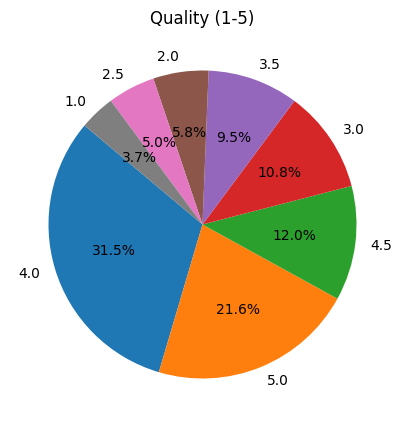

In [29]:
# Calculate the distribution of the "Quality" variable
quality_counts = df['Quality (1-5)'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Quality (1-5)')
plt.show()

##**2. Bivariate Analysis**

### **a. Contionous vs Contionous**

<Axes: >

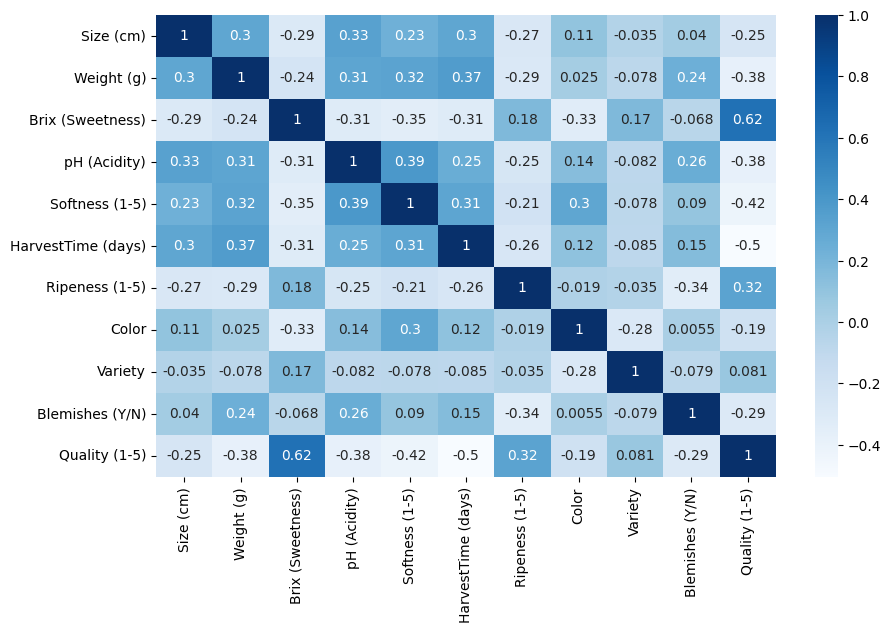

In [30]:
fig, ax = plt.subplots(figsize=(10,6)) # Sample figsize in inches, change the number accordingly
sns.heatmap(df_fix.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

# MEDV and LSTAT is having -0.85, we might need to remove one variable

In [31]:
x = df_fix.drop(['Quality (1-5)'],axis=1)
y = df_fix['Quality (1-5)']

print(x.shape)
print(y.shape)

(241, 10)
(241,)


In [32]:
# Fit and transform the labels
y_encoded = le.fit_transform(y)

print("Encoded labels:", y_encoded)
print("Classes mapping:", le.classes_)

Encoded labels: [5 6 7 4 6 0 5 6 3 7 2 5 6 7 5 7 4 5 1 6 3 7 6 1 6 5 7 5 0 3 6 6 7 5 7 4 7
 2 6 5 6 7 6 7 7 7 6 6 3 7 4 7 6 1 6 5 6 7 6 7 7 3 6 7 5 7 5 4 2 7 4 7 6 6
 3 7 4 3 7 4 3 7 5 7 4 7 6 7 5 6 2 7 5 7 7 7 7 4 6 5 3 7 1 5 5 1 3 7 1 5 1
 1 7 5 3 5 3 3 1 0 1 3 7 5 5 1 3 7 3 5 1 5 7 5 3 5 3 5 5 5 5 5 5 7 4 5 4 5
 5 0 4 5 6 5 5 5 5 0 7 5 5 4 5 5 2 5 5 5 5 5 4 5 5 5 2 3 7 7 4 3 2 6 7 5 7
 2 5 5 5 7 6 4 5 7 4 4 5 5 4 0 5 5 2 2 5 1 5 7 5 6 5 5 0 6 4 5 2 5 3 4 3 7
 2 1 5 5 4 3 5 0 7 3 0 5 3 5 7 5 7 3 5]
Classes mapping: [1.  2.  2.5 3.  3.5 4.  4.5 5. ]


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print('Number x_train dataset:', x_train.shape)
print('Number x_test dataset:', x_test.shape)
print('Number y_train dataset:', y_train.shape)
print('Number y_test dataset:', y_test.shape)

Number x_train dataset: (192, 10)
Number x_test dataset: (49, 10)
Number y_train dataset: (192,)
Number y_test dataset: (49,)


In [34]:
print("Unique classes in y_train:", set(y_encoded))

Unique classes in y_train: {0, 1, 2, 3, 4, 5, 6, 7}


In [35]:
from collections import Counter
print("Training set class distribution:", Counter(y_train))
print("Test set class distribution:", Counter(y_test))

Training set class distribution: Counter({5: 61, 7: 41, 6: 23, 3: 21, 4: 18, 1: 11, 2: 10, 0: 7})
Test set class distribution: Counter({5: 15, 7: 11, 6: 6, 3: 5, 4: 5, 1: 3, 0: 2, 2: 2})


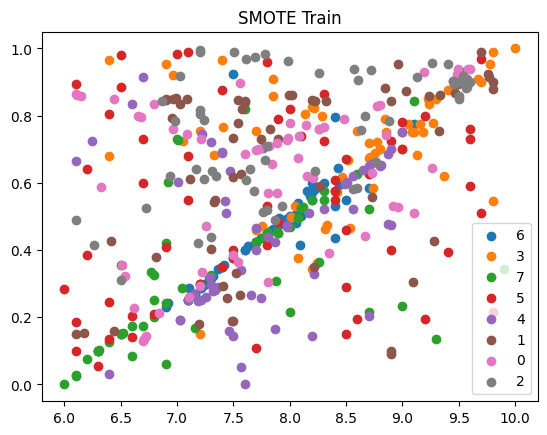

In [36]:
# Assuming x_train and y_train are your original data
sm = SMOTE(random_state=30)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)
countertrain_smote = Counter(y_train_smote)

# Convert x_train_smote to numpy array if it's a DataFrame
if isinstance(x_train_smote, pd.DataFrame):
    x_train_smote = x_train_smote.to_numpy()

# Scatter plot of examples by class label
for label, _ in countertrain_smote.items():
    row_ix = np.where(y_train_smote == label)[0]
    plt.scatter(x_train_smote[row_ix, 0], x_train_smote[row_ix, 1], label=str(label))

plt.legend()
plt.title("SMOTE Train")
plt.show()

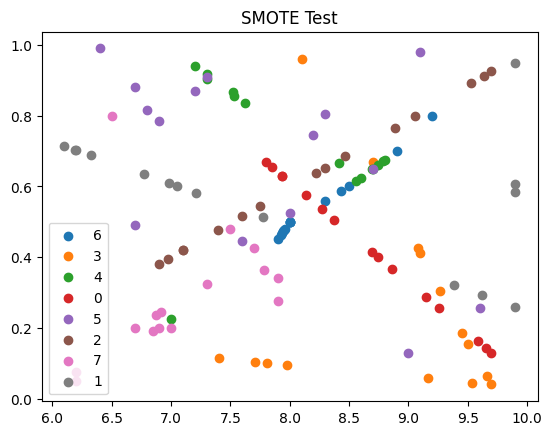

In [37]:
# Apply SMOTE with a reduced number of neighbors if necessary
sm = SMOTE(random_state=30, k_neighbors=1)  # Adjust k_neighbors based on your data size
x_test_smote, y_test_smote = sm.fit_resample(x_test, y_test)
countertest_smote = Counter(y_test_smote)

# Convert x_test_smote to numpy array if it's a DataFrame
if isinstance(x_test_smote, pd.DataFrame):
    x_test_smote = x_test_smote.to_numpy()

# Scatter plot of examples by class label
for label, _ in countertest_smote.items():
    row_ix = np.where(y_test_smote == label)[0]
    plt.scatter(x_test_smote[row_ix, 0], x_test_smote[row_ix, 1], label=str(label))

plt.legend()
plt.title("SMOTE Test")
plt.show()

In [38]:
from collections import Counter
print("Training set class distribution:", Counter(y_train_smote))
print("Test set class distribution:", Counter(y_test_smote))

Training set class distribution: Counter({6: 61, 3: 61, 7: 61, 5: 61, 4: 61, 1: 61, 0: 61, 2: 61})
Test set class distribution: Counter({6: 15, 3: 15, 4: 15, 0: 15, 5: 15, 2: 15, 7: 15, 1: 15})


5. Modeling dan Evaluasi

In [39]:
# Create StratifiedKFold with 10 folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize models
models = {
    'SVM': SVC(kernel='linear', C=1, gamma=1, degree=1, probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Placeholder for results
results = []

# Evaluate models on training and testing data
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    model.fit(x_train_smote, y_train_smote)

    # Training data evaluation
    y_train_pred = model.predict(x_train_smote)
    acc_train = accuracy_score(y_train_smote, y_train_pred)
    conf_matrix_train = confusion_matrix(y_train_smote, y_train_pred)
    f1_train = f1_score(y_train_smote, y_train_pred, average='macro')
    precision_train = precision_score(y_train_smote, y_train_pred, average='macro')
    recall_train = recall_score(y_train_smote, y_train_pred, average='macro')
    mae_train = mean_absolute_error(y_train_smote, y_train_pred)
    mse_train = mean_squared_error(y_train_smote, y_train_pred)
    r2_train = r2_score(y_train_smote, y_train_pred)

    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(x_train_smote)
        roc_auc_train = roc_auc_score(y_train_smote, y_train_proba, multi_class='ovr')
    else:
        roc_auc_train = np.nan

    # Store results for training data
    results.append({
        'Model': name,
        'Dataset': 'Training',
        'Accuracy': acc_train,
        'ROC-AUC': roc_auc_train,
        'F1 Score': f1_train,
        'Precision': precision_train,
        'Recall': recall_train,
        'MAE': mae_train,
        'MSE': mse_train,
        'R2': r2_train
    })

    # Testing data evaluation
    y_test_pred = model.predict(x_test_smote)
    acc_test = accuracy_score(y_test_smote, y_test_pred)
    conf_matrix_test = confusion_matrix(y_test_smote, y_test_pred)
    f1_test = f1_score(y_test_smote, y_test_pred, average='macro')
    precision_test = precision_score(y_test_smote, y_test_pred, average='macro')
    recall_test = recall_score(y_test_smote, y_test_pred, average='macro')
    mae_test = mean_absolute_error(y_test_smote, y_test_pred)
    mse_test = mean_squared_error(y_test_smote, y_test_pred)
    r2_test = r2_score(y_test_smote, y_test_pred)

    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(x_test_smote)
        roc_auc_test = roc_auc_score(y_test_smote, y_test_proba, multi_class='ovr')
    else:
        roc_auc_test = np.nan

    # Store results for testing data
    results.append({
        'Model': name,
        'Dataset': 'Testing',
        'Accuracy': acc_test,
        'ROC-AUC': roc_auc_test,
        'F1 Score': f1_test,
        'Precision': precision_test,
        'Recall': recall_test,
        'MAE': mae_test,
        'MSE': mse_test,
        'R2': r2_test
    })

    # Cross-Validation on training data
    y_pred_cv_train = cross_val_predict(model, x_train_smote, y_train_smote, cv=cv)
    acc_cv_train = accuracy_score(y_train_smote, y_pred_cv_train)
    conf_matrix_cv_train = confusion_matrix(y_train_smote, y_pred_cv_train)
    f1_cv_train = cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='f1_macro').mean()
    precision_cv_train = cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='precision_macro').mean()
    recall_cv_train = cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='recall_macro').mean()
    mae_cv_train = np.mean(cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='neg_mean_absolute_error'))
    mse_cv_train = np.mean(cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='neg_mean_squared_error'))
    r2_cv_train = np.mean(cross_val_score(model, x_train_smote, y_train_smote, cv=cv, scoring='r2'))

    if hasattr(model, "predict_proba"):
        y_proba_cv_train = cross_val_predict(model, x_train_smote, y_train_smote, cv=cv, method='predict_proba')
        roc_auc_cv_train = roc_auc_score(y_train_smote, y_proba_cv_train, multi_class='ovr')
    else:
        roc_auc_cv_train = np.nan

    # Store cross-validation results for training data
    results.append({
        'Model': name,
        'Dataset': 'CV Training',
        'Accuracy': acc_cv_train,
        'ROC-AUC': roc_auc_cv_train,
        'F1 Score': f1_cv_train,
        'Precision': precision_cv_train,
        'Recall': recall_cv_train,
        'MAE': mae_cv_train,
        'MSE': mse_cv_train,
        'R2': r2_cv_train
    })

    # Cross-Validation on testing data
    y_pred_cv_test = cross_val_predict(model, x_test_smote, y_test_smote, cv=cv)
    acc_cv_test = accuracy_score(y_test_smote, y_pred_cv_test)
    conf_matrix_cv_test = confusion_matrix(y_test_smote, y_pred_cv_test)
    f1_cv_test = cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='f1_macro').mean()
    precision_cv_test = cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='precision_macro').mean()
    recall_cv_test = cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='recall_macro').mean()
    mae_cv_test = np.mean(cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='neg_mean_absolute_error'))
    mse_cv_test = np.mean(cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='neg_mean_squared_error'))
    r2_cv_test = np.mean(cross_val_score(model, x_test_smote, y_test_smote, cv=cv, scoring='r2'))

    if hasattr(model, "predict_proba"):
        y_proba_cv_test = cross_val_predict(model, x_test_smote, y_test_smote, cv=cv, method='predict_proba')
        roc_auc_cv_test = roc_auc_score(y_test_smote, y_proba_cv_test, multi_class='ovr')
    else:
        roc_auc_cv_test = np.nan

    # Store cross-validation results for testing data
    results.append({
        'Model': name,
        'Dataset': 'CV Testing',
        'Accuracy': acc_cv_test,
        'ROC-AUC': roc_auc_cv_test,
        'F1 Score': f1_cv_test,
        'Precision': precision_cv_test,
        'Recall': recall_cv_test,
        'MAE': mae_cv_test,
        'MSE': mse_cv_test,
        'R2': r2_cv_test
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print("\nEvaluation Results DataFrame:")
results_df


Evaluating SVM...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


Evaluating Logistic Regression...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab


Evaluating Random Forest...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


Evaluating Gradient Boosting...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


Evaluating Decision Tree...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


Evaluating k-NN...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


Evaluating Naive Bayes...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{


Evaluating AdaBoost...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ASUS\AppData\Loca


Evaluating Extra Trees...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


Evaluating XGBoost...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:39:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:39:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:39:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no


Evaluation Results DataFrame:


,Model,Dataset,Accuracy,ROC-AUC,F1 Score,Precision,Recall,MAE,MSE,R2
0,SVM,Training,0.768443,0.953416,0.762735,0.772289,0.768443,0.413934,0.975410,0.814208
1,SVM,Testing,0.391667,0.773254,0.385881,0.395969,0.391667,1.175000,3.025000,0.423810
2,SVM,CV Training,0.682377,0.915700,0.669214,0.699939,0.691114,-0.559439,-1.297449,0.741120
3,SVM,CV Testing,0.841667,0.953968,0.753163,0.764286,0.773185,-0.300000,-0.850000,0.764043
4,Logistic Regression,Training,0.645492,0.924353,0.641616,0.644870,0.645492,0.594262,1.278689,0.756440
5,Logistic Regression,Testing,0.441667,0.807778,0.445957,0.470845,0.441667,1.075000,2.958333,0.436508
6,Logistic Regression,CV Training,0.594262,0.895655,0.580119,0.605474,0.596848,-0.688818,-1.510077,0.699605
7,Logistic Regression,CV Testing,0.833333,0.951667,0.745714,0.758036,0.766488,-0.325000,-0.908333,0.762683
8,Random Forest,Training,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
9,Random Forest,Testing,0.600000,0.845040,0.571033,0.556816,0.600000,0.833333,2.233333,0.574603


In [40]:
# Convert results to CSV
results_df.to_csv('evaluation_results.csv', index=False)

print("Results saved to 'evaluation_results.csv'")

Results saved to 'evaluation_results.csv'


In [41]:
# Initialize the Extra Trees model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model on the entire dataset
model.fit(x_train_smote, y_train_smote)

# Save the model
joblib.dump(model, 'gradient_boost_model.pkl')

print("Model saved as gradient_boost_model.pkl")

Model saved as gradient_boost_model.pkl
